In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(
    '/Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
    ))
sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
kb = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

from misloc_mispol_package.parameterize import displaced_osc_model as dom


In [2]:
## This needs to be in a seperate cell from the imports
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 150,  # to adjust notebook inline plot size
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4, 3], # 4 x 3
    'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)


In [3]:
path_to_data = (
    "/Users/chair/Documents/Academia/TAHz/"+
    "modeling_TAHz_emission/data")


## Compute following anda matrix theorm implementation and see how it compares

In [4]:
basis_size = 20
test_hbarw0 = 1
d = 1.6

lambda_g_harm = [0, 0, 0]
lambda_e_harm = dom.displaced_lambdas([0, 0, 0], d)

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_harm_inst = dom.anharmonic_mat_exp_implementation(
    lambda_g_harm,
    lambda_e_harm,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )

In [5]:
hbar_ws = np.linspace(-5, 10, 300)
em_lin_mat_thrm = anda_impl_harm_inst.emission_lineshape(
    hbar_ws)

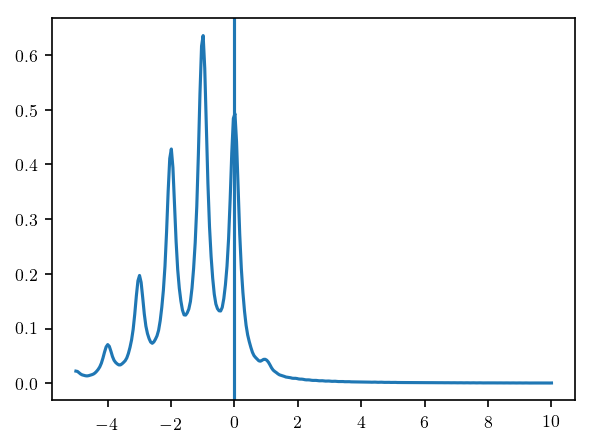

In [6]:
plt.plot((hbar_ws), em_lin_mat_thrm*2, label='mat.thrm.')
plt.axvline(0)

In [7]:
anda_impl_harm_inst.hbar_omega_eg

1.2799999999956129

So these are the same except for the shift of the Huang-Rys and a factor of 2. Let's load the data for figure 1 and check that out. 

In [8]:
anda_fig_1_thieved = np.loadtxt(
    os.path.join(path_to_data, 'Anharmonic_graph.txt'),
    delimiter=','
    )

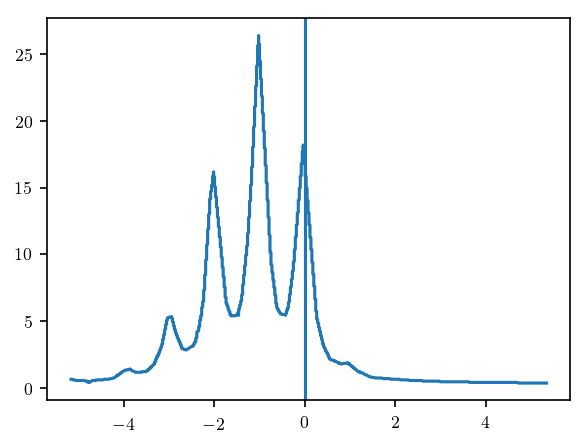

In [9]:
plt.plot(*anda_fig_1_thieved.T)
plt.axvline(0)

And try and recreat the model

In [10]:
def poly_from_lambdas(x, lambdas):
    
    y = np.zeros_like(x)
    for i, lam in enumerate(lambdas):
        y += lam * x**i 
    ## Add back in harmonic piece
    y += x**2/2 
    
    return y

In [11]:
basis_size = 20
test_hbarw0 = 1
d = 1.6

lambda_g =[
    0,
    0,
    0.500141 - .5, ## to account for H_0 
    - 0.0456629,
    0.00243193,
    - 0.000095158,
    2.99251*1e-6,
    - 7.93207*1e-8,
    + 1.82486*1e-9,
    - 3.71702*1e-11,
    6.80059*1e-13,
    - 1.13*1e-14,
    + 1.72033*1e-16,
    ]
lambda_e = dom.displaced_lambdas(lambda_g, d)

(0, 50)

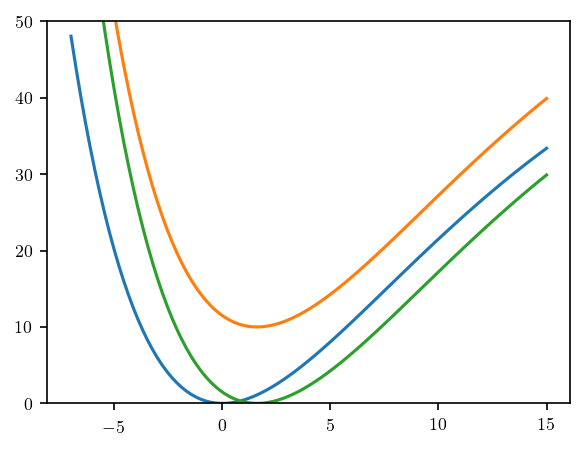

In [12]:
xs = np.linspace(-7, 15, 100)
plt.plot(xs, poly_from_lambdas(xs, lambda_g))
plt.plot(xs, 10+poly_from_lambdas(xs, lambda_e))
plt.plot(xs, poly_from_lambdas(xs, lambda_e))
plt.ylim([0,50])

In [13]:
lambda_e = dom.displaced_lambdas(lambda_g, d)

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_fig1_inst = dom.anharmonic_mat_exp_implementation(
    lambda_g,
    lambda_e,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )
    
em_lin_anda_impl_fig1 = anda_impl_fig1_inst.emission_lineshape(
    hbar_ws)

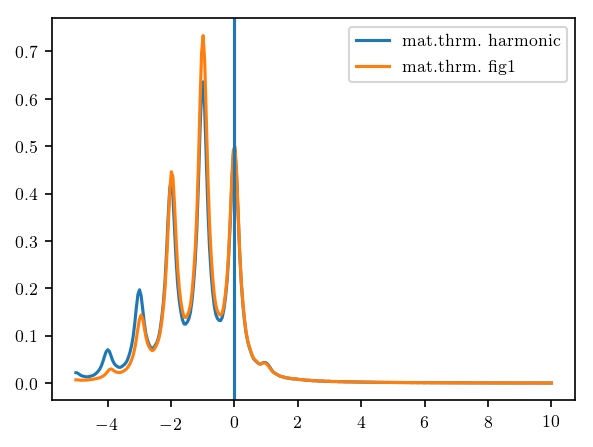

In [14]:
plt.plot((hbar_ws), em_lin_mat_thrm*2, label='mat.thrm. harmonic')
plt.plot((hbar_ws), em_lin_anda_impl_fig1*2, label='mat.thrm. fig1')
plt.axvline(0)
plt.legend()

In [15]:
anda_impl_fig1_inst.hbar_omega_eg

1.1033429344582777

In [16]:
anda_impl_fig1_inst.unitless_d**2/2

1.2800000000000002

In [17]:
lambda_e_p10v = np.copy(lambda_e)
lambda_e_p10v[0] += 10

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_fig1_inst_wplus10 = dom.anharmonic_mat_exp_implementation(
    lambda_g,
    lambda_e_p10v,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )
    
em_lin_anda_impl_fig1_wplus10 = anda_impl_fig1_inst_wplus10.emission_lineshape(
    hbar_ws)

In [18]:
lambda_e_p10v

array([ 1.14843843e+01, -1.99430315e+00,  2.60887573e-01, -6.39277637e-02,
        3.32036657e-03, -1.28601538e-04,  4.02549008e-06, -1.06464643e-07,
        2.44664875e-09, -4.97972064e-11,  9.08005696e-13, -1.46030336e-14,
        1.72033000e-16])

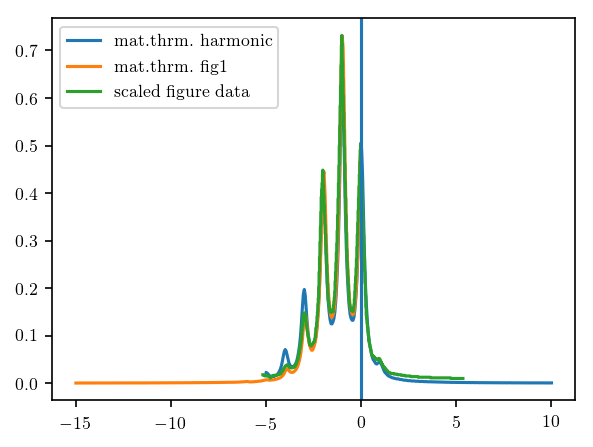

In [20]:
plt.plot((hbar_ws), em_lin_mat_thrm*2, label='mat.thrm. harmonic')
plt.plot((hbar_ws-10), (em_lin_anda_impl_fig1_wplus10)*2, label='mat.thrm. fig1')
plt.plot(
    anda_fig_1_thieved.T[0], 
    (
        anda_fig_1_thieved.T[1]
        /(anda_fig_1_thieved.T[1].max())
        *(em_lin_anda_impl_fig1_wplus10*2).max()
        ),
    label='scaled figure data'
    )
plt.axvline(0)
plt.legend()

Try accounting lambda[2] in the shift